# Galaxy Classification with Convolutional Neural Networks

In this project, I employ Convolutional Neural Networks (CNNs) to classify galaxies based on image data from the Galaxy Zoo dataset, a crowd-sourced initiative devoted to annotating galaxies for scientific discovery. Telescopic observations yield millions of celestial images, yet their scientific utility is hindered by the lack of annotations. My focus is on categorizing galaxies into four classes:

<table>
  <tr>
    <td style="text-align:center;"><b>[1,0,0,0] - Galaxies with no identifying characteristics</b><br><img src="images/class_examples/regular_galaxies.PNG" alt="Regular Galaxies" width="400" height="150"></td>
    <td style="text-align:center;"><b>[0,1,0,0] - Galaxies with rings</b><br><img src="images/class_examples/ringed_galaxies.PNG" alt="Ringed Galaxies" width="400" height="150"></td>
  </tr>
  <tr>
    <td style="text-align:center;"><b>[0,0,1,0] - Galactic mergers</b><br><img src="images/class_examples/merger_galaxies.PNG" alt="Galactic Mergers" width="400" height="150"></td>
    <td style="text-align:center;"><b>[0,0,0,1] - “Other,” Irregular celestial bodies</b><br><img src="images/class_examples/other_galaxies.PNG" alt="Other Galaxies" width="400" height="150"></td>
  </tr>
</table>

**Neural Architecture**

The neural model comprises convolutional layers, employing ReLU activation and max-pooling for spatial feature extraction. The architecture includes flattening, dense layers with ReLU activation, and an output layer with softmax activation for classification.

**Model Configuration**

The model is configured with the Adam optimizer, categorical crossentropy loss (due to one-hot encoding of labels), and metrics like categorical accuracy and AUC. Training involves learning from annotated data to predict galaxy classes.

**Performance Metrics**

The model achieves accuracy scores surpassing 70%, outperforming random baseline models by approx. 45%. The AUC metric, exceeding 80%, emphasizes the model's ability to discern true classes from false ones.

**Visualization**

Visualizing CNN activations provides insights into the features influencing the model's classification of deep-space galaxies.

---------------

# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

## Load Data

In [2]:
# Load the load_galaxy_data function from the load_data.py file
from functions.load_data import load_galaxy_data

# Load the data
input_data, labels = load_galaxy_data()

Successfully loaded galaxy data!


In [3]:
# Inspect shape of input and labels
print(f"Shape of input_data: {input_data.shape}")
print(f"Shape of labels: {labels.shape}")

Shape of input_data: (1400, 128, 128, 3)
Shape of labels: (1400, 4)


Last dimension of the data (3) indicates that the image data is RGB/in color. Last dimension of the labels (4), and given that data has four classes, labels are one-hot vectors (i.e, [1,0,0,0] → Normal galaxy).

In [4]:
# Split data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(input_data, 
                                                      labels, 
                                                      test_size=0.20, 
                                                      stratify=labels, 
                                                      shuffle=True, 
                                                      random_state=222)

## Preprocess

In [5]:
# Initialize ImageDataGenerator for training data and normalize (rescale pixel values by 255)
data_generator = ImageDataGenerator(rescale = 1.0/255)

In [6]:
# Define batch size
batch_size = 5

# Create training and validation iterators
training_iterator = data_generator.flow(x_train, y_train, batch_size=batch_size)
validation_iterator = data_generator.flow(x_valid, y_valid, batch_size=batch_size)

## Build the Model

In [7]:
print("Building model...")
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(input_data.shape[1], 
                                input_data.shape[2], 
                                input_data.shape[3]))) # Input layer, shaped based on input data
model.add(tf.keras.layers.Conv2D(8, 3, strides=2, activation="relu")) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(8, 3, strides=2, activation="relu")) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation='softmax')) # Output layer, 4 nodes for 4 classes, softmax activation for classification
model.summary()

Building model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 63, 63, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 8)         584       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 16

In [8]:
print("Compiling model...")
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(), # because labels are one-hot encoded
    metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()]
)
print("Compiling model finished.")

Compiling model...
Compiling model finished.


In [9]:
print("Training model...\n")
model.fit(
        training_iterator, # or validation_iterator 
        steps_per_epoch=len(x_train)/batch_size,
        epochs=12,
        validation_data=validation_iterator,
        validation_steps=len(x_valid)/batch_size)
print("\nTraining model finished.")

Training model...

Epoch 1/12
224/224 [==============================] - 4s 10ms/step - loss: 1.3199 - categorical_accuracy: 0.3750 - auc: 0.6199 - val_loss: 1.1819 - val_categorical_accuracy: 0.4643 - val_auc: 0.7737
Epoch 2/12
224/224 [==============================] - 2s 9ms/step - loss: 1.2006 - categorical_accuracy: 0.4616 - auc: 0.7305 - val_loss: 1.1005 - val_categorical_accuracy: 0.5214 - val_auc: 0.7995
Epoch 3/12
224/224 [==============================] - 2s 8ms/step - loss: 1.1225 - categorical_accuracy: 0.5071 - auc: 0.7715 - val_loss: 1.0263 - val_categorical_accuracy: 0.6036 - val_auc: 0.8428
Epoch 4/12
224/224 [==============================] - 2s 8ms/step - loss: 1.0481 - categorical_accuracy: 0.5705 - auc: 0.8068 - val_loss: 1.0207 - val_categorical_accuracy: 0.5500 - val_auc: 0.8149
Epoch 5/12
224/224 [==============================] - 2s 8ms/step - loss: 1.0096 - categorical_accuracy: 0.5795 - auc: 0.8209 - val_loss: 1.0157 - val_categorical_accuracy: 0.5929 - val_au

**Summary:**  
- Accuracy scores indicate that the model assigns the highest probability to the correct class more than 70% of the time. For a classification task with over four classes, this is no small feat: a random baseline model would achieve only ~25% accuracy (1/number of classes) on the dataset. 
- AUC shows that for a random galaxy, there is more than an 80% chance the model would assign a higher probability to a true class than to a false one.

## Visualizing the Process of Convolutional Neural Network

Directory 'images/processed_images' already exists.
1/1 [==============================] - 0s 129ms/step
Galaxy_0
	Model prediction: [0.15176313 0.6856756  0.10678629 0.05577497]
	True label: Regular (0)
	Correct: False


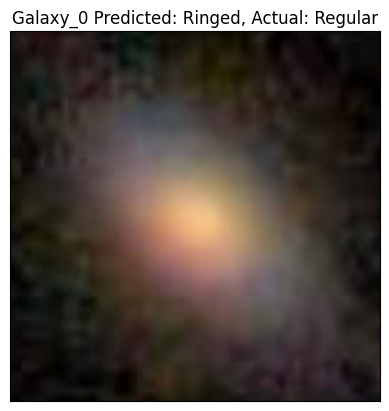

<Figure size 640x480 with 0 Axes>

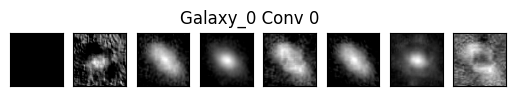

<Figure size 640x480 with 0 Axes>

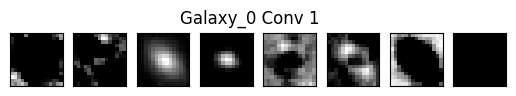

Galaxy_1
	Model prediction: [0.74801123 0.00446878 0.12746474 0.12005517]
	True label: Merger (2)
	Correct: False


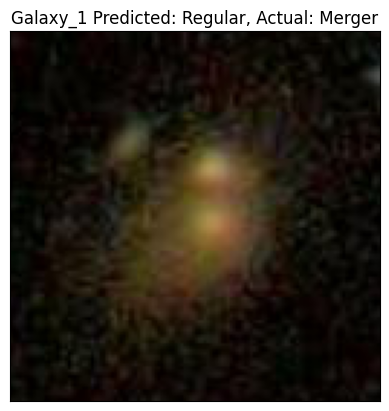

<Figure size 640x480 with 0 Axes>

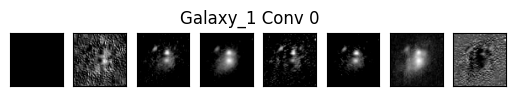

<Figure size 640x480 with 0 Axes>

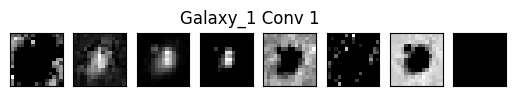

Galaxy_2
	Model prediction: [0.06659582 0.11888331 0.5605399  0.25398096]
	True label: Merger (2)
	Correct: True


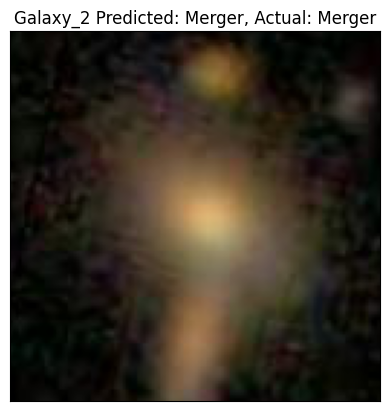

<Figure size 640x480 with 0 Axes>

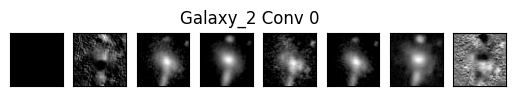

<Figure size 640x480 with 0 Axes>

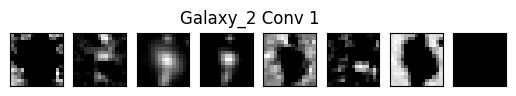

Galaxy_3
	Model prediction: [0.06338252 0.00367516 0.45548967 0.47745264]
	True label: Merger (2)
	Correct: False


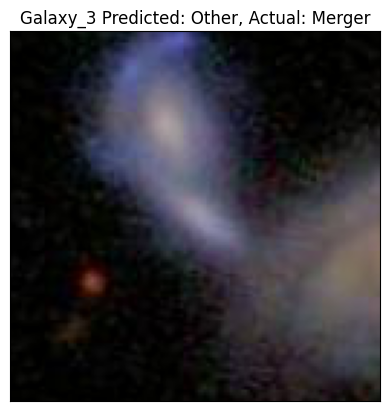

<Figure size 640x480 with 0 Axes>

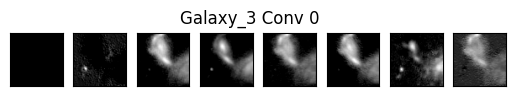

<Figure size 640x480 with 0 Axes>

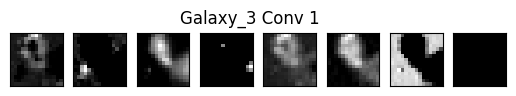

Galaxy_4
	Model prediction: [0.84239864 0.01266725 0.08589317 0.05904097]
	True label: Merger (2)
	Correct: False


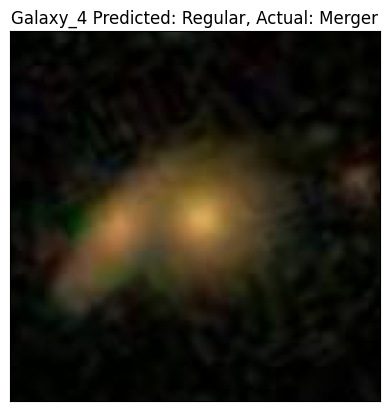

<Figure size 640x480 with 0 Axes>

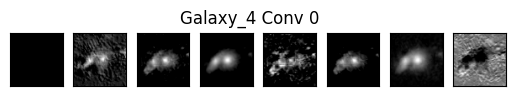

<Figure size 640x480 with 0 Axes>

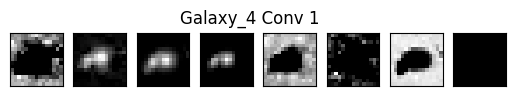

<Figure size 640x480 with 0 Axes>

In [10]:
# Load the visualize_activations function from the visualize.py file
from functions.visualize import visualize_activations

# Visualize activations
visualize_activations(model, validation_iterator)